# Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score


In [ ]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

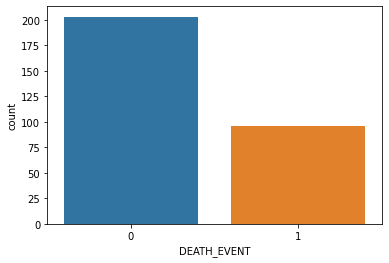

In [ ]:

#first of all let us evaluate the target and find out if our data is imbalanced or not

sns.countplot(x= data["DEATH_EVENT"])

In [ ]:
#assigning values to features as X and target as y
X=data.drop(["DEATH_EVENT"],axis=1)
y=data["DEATH_EVENT"]

In [ ]:
#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df


array([[ 1.19205124e+00, -8.71104775e-01,  1.65728387e-04, ...,
         7.35688190e-01, -6.87681906e-01, -1.62950241e+00],
       [-4.91308537e-01, -8.71104775e-01,  7.51463953e+00, ...,
         7.35688190e-01, -6.87681906e-01, -1.60369074e+00],
       [ 3.50371351e-01, -8.71104775e-01, -4.49938761e-01, ...,
         7.35688190e-01,  1.45416070e+00, -1.59078490e+00],
       ...,
       [-1.33298842e+00, -8.71104775e-01,  1.52597865e+00, ...,
        -1.35927151e+00, -6.87681906e-01,  1.90669738e+00],
       [-1.33298842e+00, -8.71104775e-01,  1.89039811e+00, ...,
         7.35688190e-01,  1.45416070e+00,  1.93250906e+00],
       [-9.12148480e-01, -8.71104775e-01, -3.98321274e-01, ...,
         7.35688190e-01,  1.45416070e+00,  1.99703825e+00]])

In [ ]:
X_df = pd.DataFrame(X_df, columns=col_names)
X_df


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192051,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491309,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350371,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912148,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350371,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.097867,-0.871105,-0.537688,1.179830,-0.007077,1.359272,-1.109765e+00,-0.284552,1.447094,0.735688,1.454161,1.803451
295,-0.491309,-0.871105,1.278215,-0.847579,-0.007077,-0.735688,6.802472e-02,-0.187726,0.539054,-1.359272,-0.687682,1.816357
296,-1.332988,-0.871105,1.525979,1.179830,1.854958,-0.735688,4.902082e+00,-0.575031,0.312044,-1.359272,-0.687682,1.906697
297,-1.332988,-0.871105,1.890398,-0.847579,-0.007077,-0.735688,-1.263389e+00,0.005926,0.766064,0.735688,1.454161,1.932509


In [ ]:
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,2.406102e-16,1.001676,-1.753828,-0.827980,-0.070469,0.771211,2.875411
anaemia,299.0,3.594301e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,3.713120e-18,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,1.113936e-16,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,3.341808e-18,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,-4.841909e-16,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,1.009969e-16,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,-2.227872e-18,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.627435e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-5.940993e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


In [ ]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.25,random_state=7)

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=30, # how many epochs to wait before stopping
    restore_best_weights=True)

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
from tensorflow.keras.optimizers import SGD
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 500,callbacks=[early_stopping], validation_split=0.2)


Epoch 1/500
6/6 [==============================] - 32s 363ms/step - loss: 0.6930 - accuracy: 0.5225 - val_loss: 0.6922 - val_accuracy: 0.6667
Epoch 2/500
6/6 [==============================] - 0s 20ms/step - loss: 0.6921 - accuracy: 0.6499 - val_loss: 0.6913 - val_accuracy: 0.6667
Epoch 3/500
6/6 [==============================] - 0s 13ms/step - loss: 0.6917 - accuracy: 0.6102 - val_loss: 0.6904 - val_accuracy: 0.6667
Epoch 4/500
6/6 [==============================] - 0s 17ms/step - loss: 0.6908 - accuracy: 0.6314 - val_loss: 0.6896 - val_accuracy: 0.6667
Epoch 5/500
6/6 [==============================] - 0s 26ms/step - loss: 0.6901 - accuracy: 0.6328 - val_loss: 0.6887 - val_accuracy: 0.6667
Epoch 6/500
6/6 [==============================] - 0s 14ms/step - loss: 0.6896 - accuracy: 0.6271 - val_loss: 0.6878 - val_accuracy: 0.6667
Epoch 7/500
6/6 [==============================] - 0s 9ms/step - loss: 0.6868 - accuracy: 0.6956 - val_loss: 0.6870 - val_accuracy: 0.6667
Epoch 8/500
6/6 [==

6/6 [==============================] - 0s 13ms/step - loss: 0.6535 - accuracy: 0.6453 - val_loss: 0.6442 - val_accuracy: 0.6667
Epoch 118/500
6/6 [==============================] - 0s 11ms/step - loss: 0.6557 - accuracy: 0.6400 - val_loss: 0.6440 - val_accuracy: 0.6667
Epoch 119/500
6/6 [==============================] - 0s 10ms/step - loss: 0.6622 - accuracy: 0.6250 - val_loss: 0.6439 - val_accuracy: 0.6667
Epoch 120/500
6/6 [==============================] - 0s 11ms/step - loss: 0.6638 - accuracy: 0.6212 - val_loss: 0.6438 - val_accuracy: 0.6667
Epoch 121/500
6/6 [==============================] - 0s 10ms/step - loss: 0.6348 - accuracy: 0.6871 - val_loss: 0.6436 - val_accuracy: 0.6667
Epoch 122/500
6/6 [==============================] - 0s 9ms/step - loss: 0.6561 - accuracy: 0.6384 - val_loss: 0.6435 - val_accuracy: 0.6667
Epoch 123/500
6/6 [==============================] - 0s 11ms/step - loss: 0.6415 - accuracy: 0.6712 - val_loss: 0.6434 - val_accuracy: 0.6667
Epoch 124/500
6/6 [==

Epoch 175/500
6/6 [==============================] - 0s 9ms/step - loss: 0.6283 - accuracy: 0.6886 - val_loss: 0.6397 - val_accuracy: 0.6667
Epoch 176/500
6/6 [==============================] - 0s 12ms/step - loss: 0.6577 - accuracy: 0.6325 - val_loss: 0.6397 - val_accuracy: 0.6667
Epoch 177/500
6/6 [==============================] - 0s 12ms/step - loss: 0.6271 - accuracy: 0.6905 - val_loss: 0.6396 - val_accuracy: 0.6667
Epoch 178/500
6/6 [==============================] - 0s 8ms/step - loss: 0.6687 - accuracy: 0.6115 - val_loss: 0.6396 - val_accuracy: 0.6667
Epoch 179/500
6/6 [==============================] - 0s 9ms/step - loss: 0.6520 - accuracy: 0.6432 - val_loss: 0.6395 - val_accuracy: 0.6667
Epoch 180/500
6/6 [==============================] - 0s 11ms/step - loss: 0.6668 - accuracy: 0.6151 - val_loss: 0.6395 - val_accuracy: 0.6667
Epoch 181/500
6/6 [==============================] - 0s 11ms/step - loss: 0.6344 - accuracy: 0.6762 - val_loss: 0.6394 - val_accuracy: 0.6667
Epoch 182

In [ ]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 66.67%


In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()

In [ ]:
y_test

268    0
240    0
278    0
176    0
202    0
      ..
24     1
62     0
249    0
90     0
50     1
Name: DEATH_EVENT, Length: 75, dtype: int64

<AxesSubplot:>

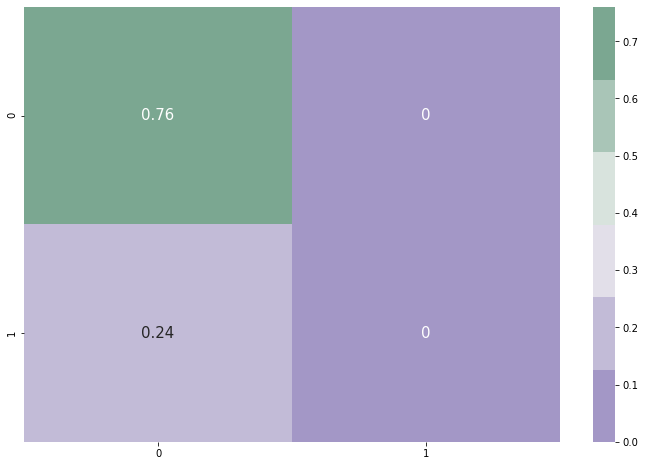

In [ ]:
cmap1 = sns.diverging_palette(275,150,  s=40, l=65, n=6)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})